# Education Data Analysis - Characterizing the time evolution of the grades distributions
Author : Adrián Llamas Jaramillo

In [19]:
# Import relevant libraries
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [6]:
# Load the .csv data sets into pandas dataFrames
df_prim = pd.read_csv("../Data/Raw/Avaluació_de_sisè_d'educació_primària_20251112.csv")
df_sec = pd.read_csv("../Data/Raw/Avaluació_de_quart_d’Educació_Secundària_Obligatòria_20251112.csv")

C:\Users\ADRIÁN\AppData\Local\Temp\ipykernel_103360\262454671.py:2: DtypeWarning: Columns (12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_prim = pd.read_csv("../Data/Raw/Avaluació_de_sisè_d'educació_primària_20251112.csv")
C:\Users\ADRIÁN\AppData\Local\Temp\ipykernel_103360\262454671.py:3: DtypeWarning: Columns (3,6,10,11,12,13,14,16,18,19,20,21,22,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sec = pd.read_csv("../Data/Raw/Avaluació_de_quart_d’Educació_Secundària_Obligatòria_20251112.csv")


In [7]:
# show first rows to give an idea of the data sets content
df_prim.head()

,ANY,CODI_ALUMNE,PCAT,PCAT_CL,PCAT_EE,PCAST,PCAST_CL,PCAST_EE,PMAT,PMAT_NC,...,PMED,PMED_COMP1,PMED_COMP2,PMED_COMP3,GENERE,MES_NAIXEMENT,ANY_NAIXEMENT,AREA_TERRITORIAL,NATURALESA,HÀBITAT
0,2023,3.293539e+09,"82,70","88,64","66,67","92,00","100,00","88,89","67,40","85,71",...,"61,39","87,50","30,00","66,67",D,6.0,2011.0,Tarragona,Privat,De 10001 a 100000
1,2023,3.293527e+09,"73,70","81,82","55,56","81,00","86,36","72,22","89,40","85,71",...,"88,33","75,00","90,00","100,00",H,12.0,2011.0,Tarragona,Privat,De 10001 a 100000
2,2023,3.293515e+09,"82,00","79,55","77,78","88,70","90,91","83,33","100,00","100,00",...,"96,67","100,00","90,00","100,00",D,8.0,2011.0,Tarragona,Privat,De 10001 a 100000
3,2023,3.293504e+09,"53,50","68,18","22,22","71,80","75,00","66,67","87,20","78,57",...,"70,28","37,50","90,00","83,33",D,11.0,2011.0,Tarragona,Privat,De 10001 a 100000
4,2023,3.293494e+09,"37,90","31,82","38,89",NaN,NaN,NaN,NaN,NaN,...,"27,78","25,00","0,00","58,33",H,9.0,2011.0,Tarragona,Privat,Més de 100000


In [8]:
df_sec.head()

,ANY,CODI_ALUMNE,PCAT,PCAT_CL,PCAT_EE,PCAST,PCAST_CL,PCAST_EE,PANG,PANG_CO,...,PCIEN_COMP1,PCIEN_COMP2,PCIEN_COMP3,PCIEN_COMP4,GENERE,MES_NAIXEMENT,ANY_NAIXEMENT,NATURALESA,ÀREA TERRITORIAL,HÀBITAT
0,2023,3.901524e+09,"75,23","73,75","78,13","79,4",74.0,"87,5","78,4",80,...,"77,27","83,33","87,5",NaN,H,6.0,2007.0,Privada,Barcelonès,De 10001 a 100000
1,2023,3.903494e+09,"65,61","70,11","59,38","74,55",68.0,"84,38",74,80,...,"81,82",75,75,NaN,H,9.0,2007.0,Privada,Barcelonès,De 10001 a 100000
2,2023,4.328916e+09,"38,11","53,71","15,63","50,7",72.0,"18,75",56,"53,33",...,"68,18","33,33",50,NaN,H,7.0,2007.0,Privada,Barcelonès,De 10001 a 100000
3,2023,3.901434e+09,"89,37","90,15","87,5","86,45",92.0,"78,13","88,8","93,33",...,"86,36","91,67",75,NaN,H,5.0,2007.0,Privada,Barcelonès,De 10001 a 100000
4,2023,3.900118e+09,"65,56","71,93","56,25","63,35",66.0,"59,38","66,6","86,67",...,"59,09","66,67","62,5",NaN,H,8.0,2006.0,Privada,Barcelonès,De 10001 a 100000


### Cleaning the data sets:
Before working with the (raw) data we filter and preprocess the following:
* NaNs (empty cells. In the .csv files appear as ""). We ingore such cells.
* Decimal symbol (some columns use a coma instead of a dot as the separator). We impose a global dot separation.
* Make sure all numerical cells have a numerical type and all string cells have a string type. 
* Generate two separate clean dataFrames, one for primary and another for secondary.

In [ ]:
# This block of code may take ~2 min to execute...

for pri_col, sec_col in zip(df_prim.columns, df_sec.columns):
    # Select grade-related colums
    if pri_col[0] == 'P':
        # Replce decimal symbol
        df_prim[pri_col] = df_prim[pri_col].astype(str).str.replace(',', '.')
        # Convert column to numeric type (ignoring NaNs)
        df_prim[pri_col] = pd.to_numeric(df_prim[pri_col], errors='coerce')
    if sec_col[0] == 'P':
        df_sec[sec_col] = df_sec[sec_col].astype(str).str.replace(',', '.')
        df_sec[sec_col] = pd.to_numeric(df_sec[sec_col], errors='coerce')
df_prim = df_prim.sort_values(by='ANY')
df_sec = df_sec.sort_values(by='ANY')

### How many data points do we have after cleaning?
* We will only work with the columns related to the grades of particular subjects: `asign_prim` and `asign_sec`.
* All subject column names begin with 'P'.
* All subject's _competències bàsiques_ contain '_' (to distinguish between them and the subjects grades per se.)

In [15]:
# Final data Series we will work with:

asign_prim = [col for col in df_prim.columns if col[0] == 'P' and '_' not in col]
print('Primary School (6th grade):')
for a in asign_prim:
    # Ignore empty cells and show the final num. of data points
    count_valid = df_prim[a].notna().sum()
    print(f"{a}: {count_valid} valid data")
print("--------------------------")

asign_sec = [col for col in df_sec.columns if col[0] == 'P' and '_' not in col]
print('Secondary School (4t ESO):')
for a in asign_sec:
    count_valid = df_sec[a].notna().sum()
    print(f"{a}: {count_valid} valid data")

Primary School (6th grade):
PCAT: 943255 valid data
PCAST: 946763 valid data
PMAT: 948989 valid data
PANG: 884461 valid data
PFRAN: 4621 valid data
PMED: 361234 valid data
--------------------------
Secondary School (4t ESO):
PCAT: 748100 valid data
PCAST: 739396 valid data
PANG: 745075 valid data
PFRAN: 65727 valid data
PMAT: 753658 valid data
PALE: 715 valid data
PCIEN: 524930 valid data


(Note the small number of available data points for French in primary school and for German in secondary school.)

In [21]:
# Create plot directories:
# Base directory: one level above current
base_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Root folder for these figures
time_root = os.path.join(base_dir, "Time-Plots")
os.makedirs(time_root, exist_ok=True)

## Ridge plots
We obtain the distribution of grades for each subject and year, both for the primary and secondary cleaned data sets. 

### Primary school ridge plots

c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


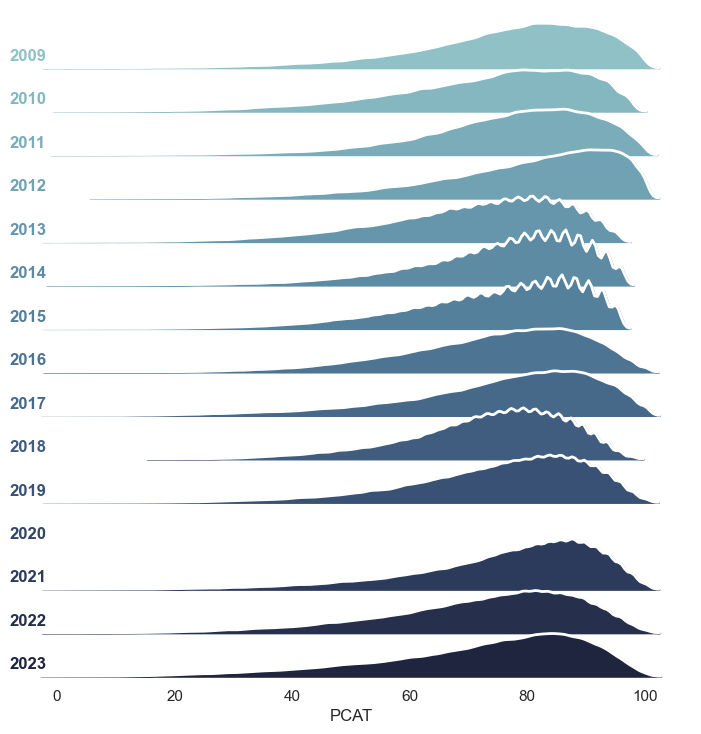

c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


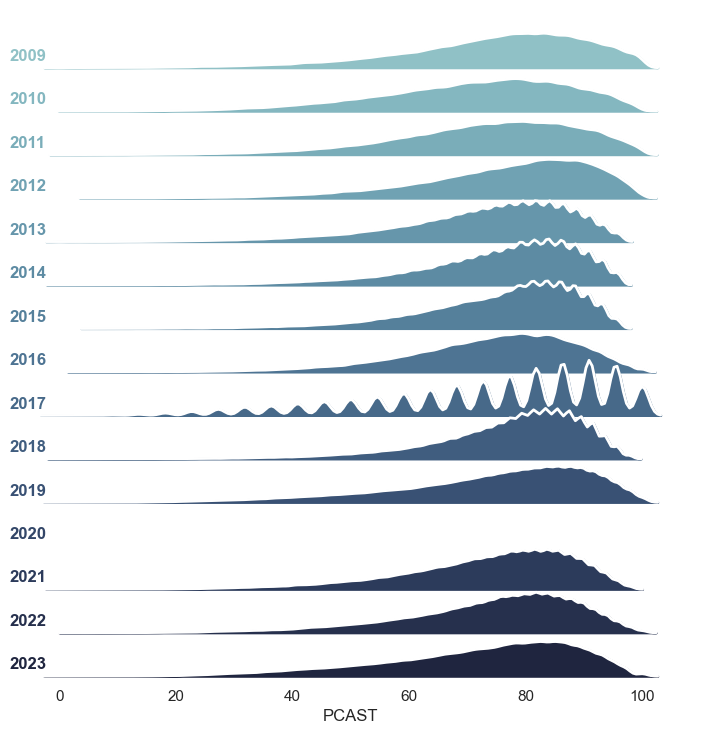

c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


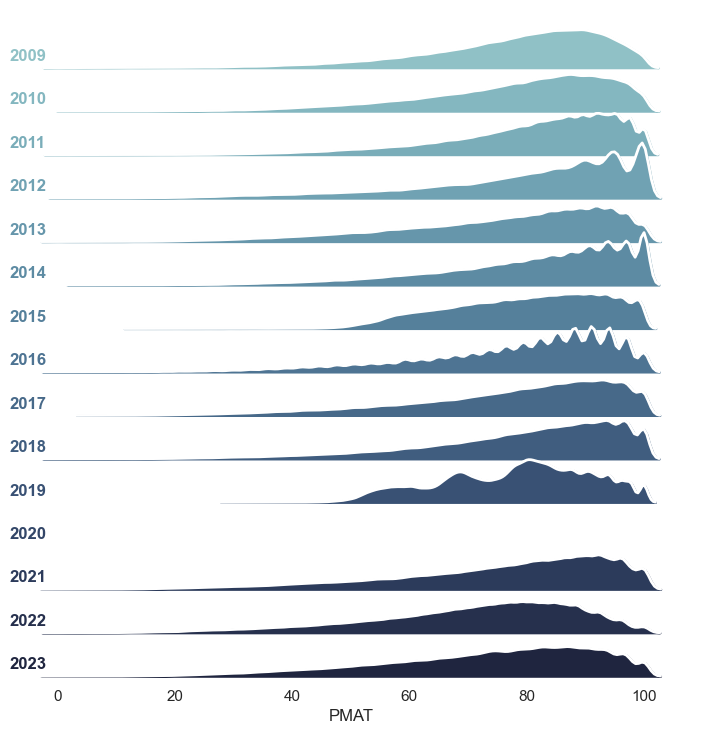

c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


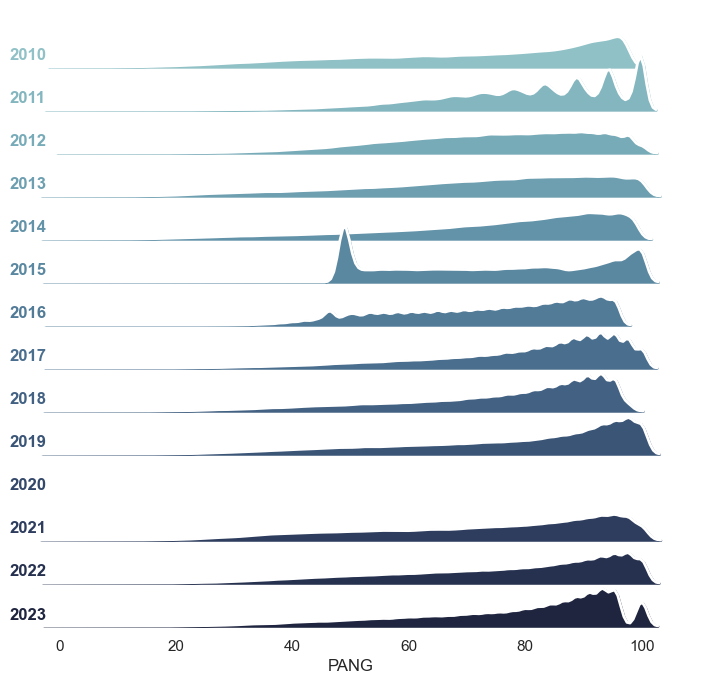

c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


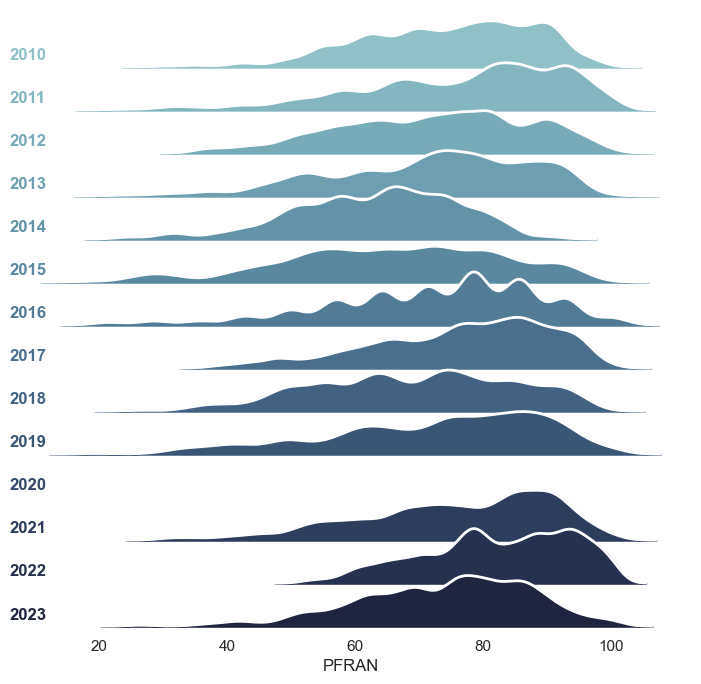

c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


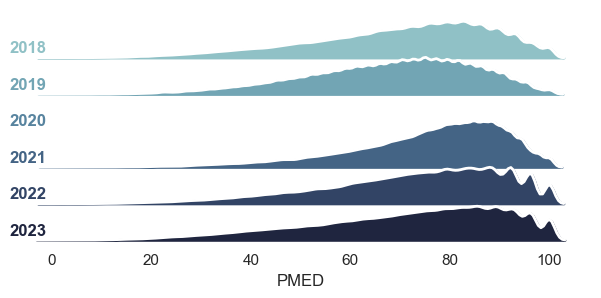

In [22]:
# Configure seaborn's theme
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Obtain the subject's lists (columns that start with 'P')
subjects = [col for col in df_prim.columns if col[0] == 'P' and '_' not in col]

for subject in subjects:
    # Original data
    df_subject = df_prim[['ANY', subject]].copy()
    df_subject = df_subject.dropna()
    df_subject['ANY'] = df_subject['ANY'].astype(int)

    # -------------------------------
    # 1) Full range of spanned years
    # -------------------------------
    yr_min = df_subject['ANY'].min()
    yr_max = df_subject['ANY'].max()
    yr_complete = np.arange(yr_min, yr_max + 1)

    # -------------------------------
    # 2) Include empty years
    # -------------------------------
    df_full = pd.DataFrame({'ANY': yr_complete})
    df_full['ANY'] = df_full['ANY'].astype(int)

    # Merge left to force all years to appear
    df_subject_full = df_full.merge(df_subject, on='ANY', how='left')

    # Convert ANY to string for seaborn
    df_subject_full['ANY'] = df_subject_full['ANY'].astype(str)

    # Palette
    num_years = len(yr_complete)
    pal = sns.cubehelix_palette(num_years, rot=-.25, light=.7)

    # -------------------------------
    # 3) FacetGrid with all the years
    # -------------------------------
    g = sns.FacetGrid(
        df_subject_full, 
        row="ANY",
        hue="ANY",
        aspect=15,
        height=.5,
        palette=pal)

    # -------------------------------
    # 4) Show distribution only if there is data to show in the first place
    # -------------------------------
    def kde_or_empty(x, color, label, **kwargs):
        if x.notna().sum() > 1:   # enough for kde
            sns.kdeplot(
                x, bw_adjust=.5, clip_on=False,
                fill=True, alpha=1, linewidth=1.5, color=color
            )
            sns.kdeplot(
                x, clip_on=False, color="w", lw=2, bw_adjust=.5
            )

    g.map(kde_or_empty, subject)

    # -------------------------------
    # 5) Years labels
    # -------------------------------
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)

    g.map(label, subject)

    # Visual adjustments
    g.figure.subplots_adjust(hspace=-.25)
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)

    # Save and show
    
    filename=f"ridge_{subject}_prim.pdf"
    plt.savefig(os.path.join(time_root, filename), bbox_inches="tight")
    plt.show()


### Secondary school ridge plots

c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


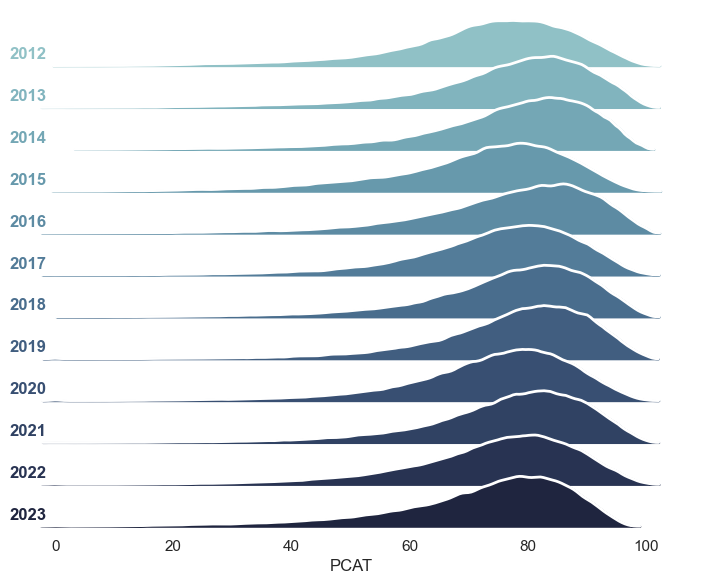

c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


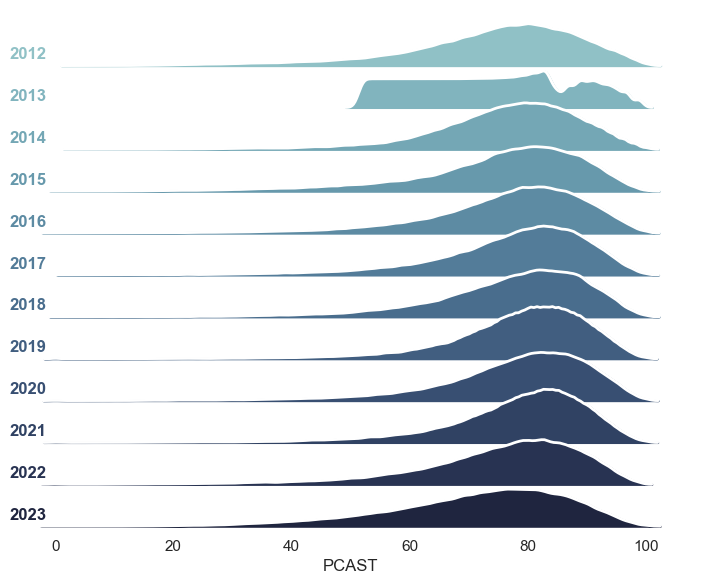

c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


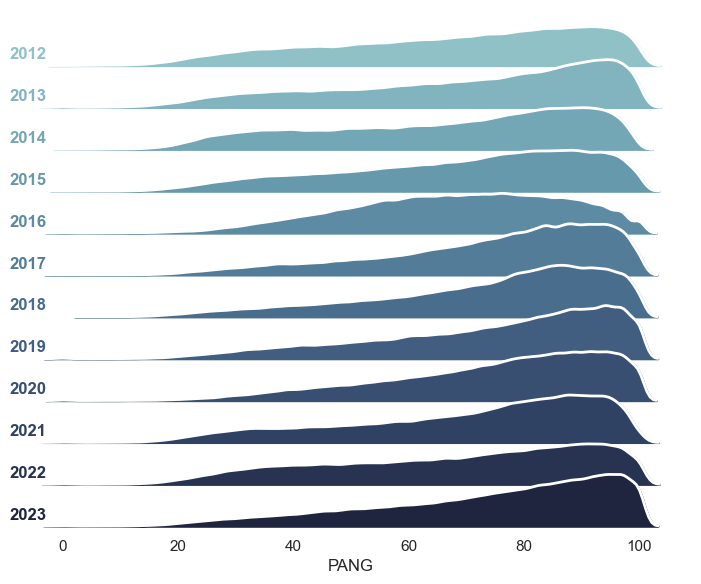

c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


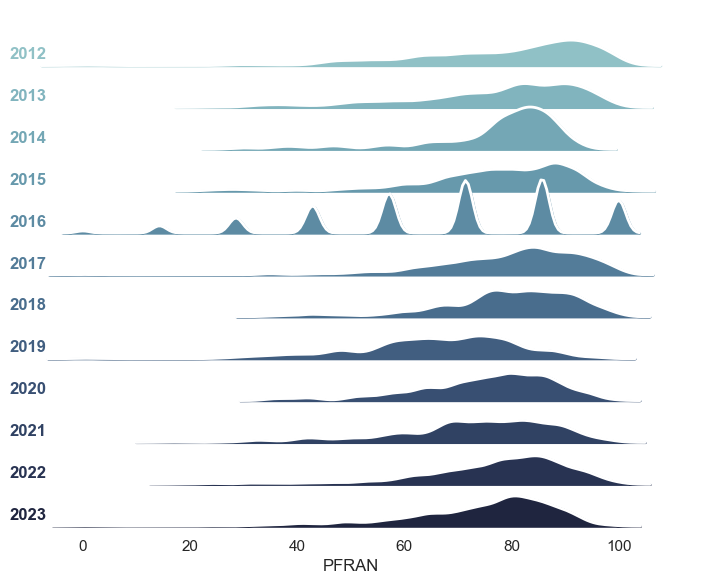

c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


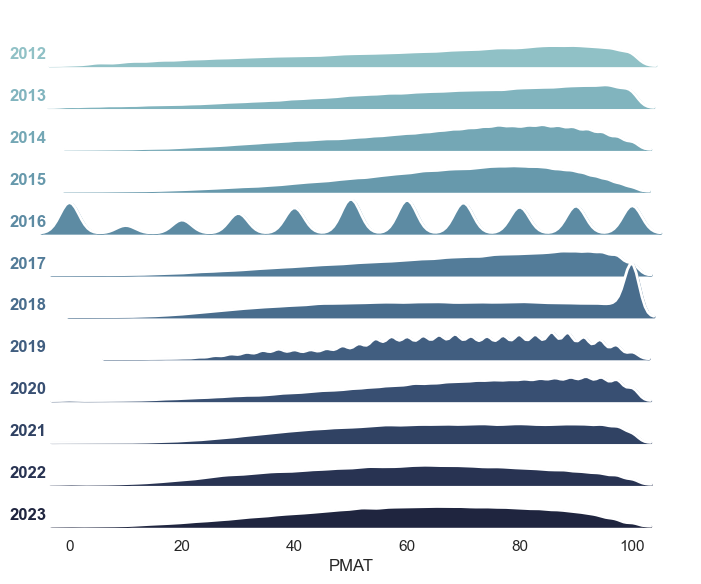

c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


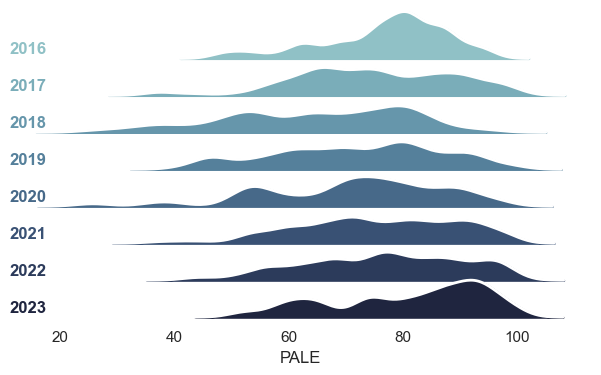

c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ADRIÁN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


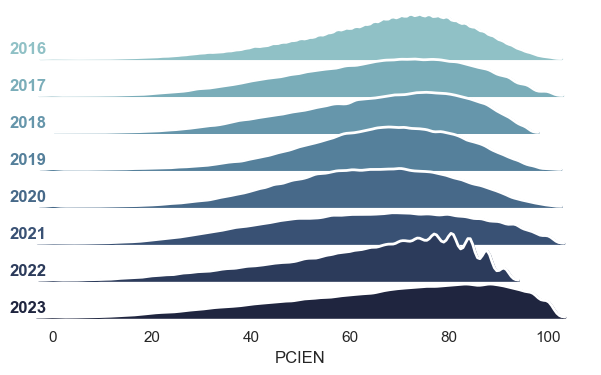

In [23]:
# Configure seaborn's theme
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Obtain the subject's lists (columns that start with 'P')
subjects = [col for col in df_sec.columns if col[0] == 'P' and '_' not in col]

for subject in subjects:
    # Original data
    df_subject = df_sec[['ANY', subject]].copy()
    df_subject = df_subject.dropna()
    df_subject['ANY'] = df_subject['ANY'].astype(int)

    # -------------------------------
    # 1) Full range of spanned years
    # -------------------------------
    yr_min = df_subject['ANY'].min()
    yr_max = df_subject['ANY'].max()
    yr_complete = np.arange(yr_min, yr_max + 1)

    # -------------------------------
    # 2) Include empty years
    # -------------------------------
    df_full = pd.DataFrame({'ANY': yr_complete})
    df_full['ANY'] = df_full['ANY'].astype(int)

    # Merge left to force all years to appear
    df_subject_full = df_full.merge(df_subject, on='ANY', how='left')

    # Convert ANY to string for seaborn
    df_subject_full['ANY'] = df_subject_full['ANY'].astype(str)

    # Palette
    num_years = len(yr_complete)
    pal = sns.cubehelix_palette(num_years, rot=-.25, light=.7)

    # -------------------------------
    # 3) FacetGrid with all the years
    # -------------------------------
    g = sns.FacetGrid(
        df_subject_full, 
        row="ANY",
        hue="ANY",
        aspect=15,
        height=.5,
        palette=pal)

    # -------------------------------
    # 4) Show distribution only if there is data to show in the first place
    # -------------------------------
    def kde_or_empty(x, color, label, **kwargs):
        if x.notna().sum() > 1:   # enough for kde
            sns.kdeplot(
                x, bw_adjust=.5, clip_on=False,
                fill=True, alpha=1, linewidth=1.5, color=color
            )
            sns.kdeplot(
                x, clip_on=False, color="w", lw=2, bw_adjust=.5
            )

    g.map(kde_or_empty, subject)

    # -------------------------------
    # 5) Years labels
    # -------------------------------
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)

    g.map(label, subject)

    # Visual adjustments
    g.figure.subplots_adjust(hspace=-.25)
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)

    # Save and show
    
    filename=f"ridge_{subject}_sec.pdf"
    plt.savefig(os.path.join(time_root, filename), bbox_inches="tight")
    plt.show()


## Time evolution of the distributions: mean, median and IQR
We study the symmetry and variablility of the previous distributions more quantiatively. The mean, median and inter-quartile range (IQR) are computed, as well as a randomization simulation of the year's to get a 'pure random' region to interpret mean values fluctuations from year to year.

### Primary

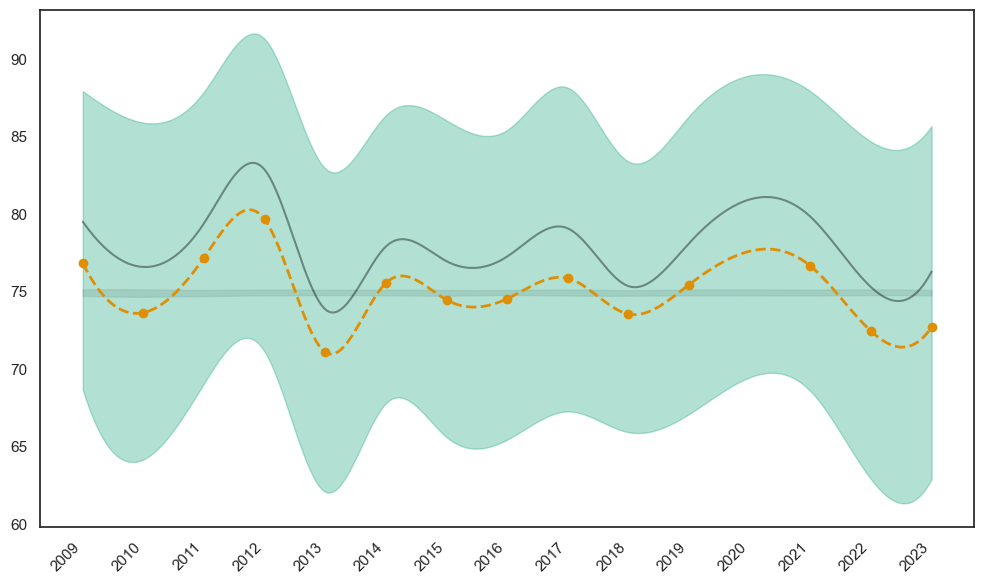

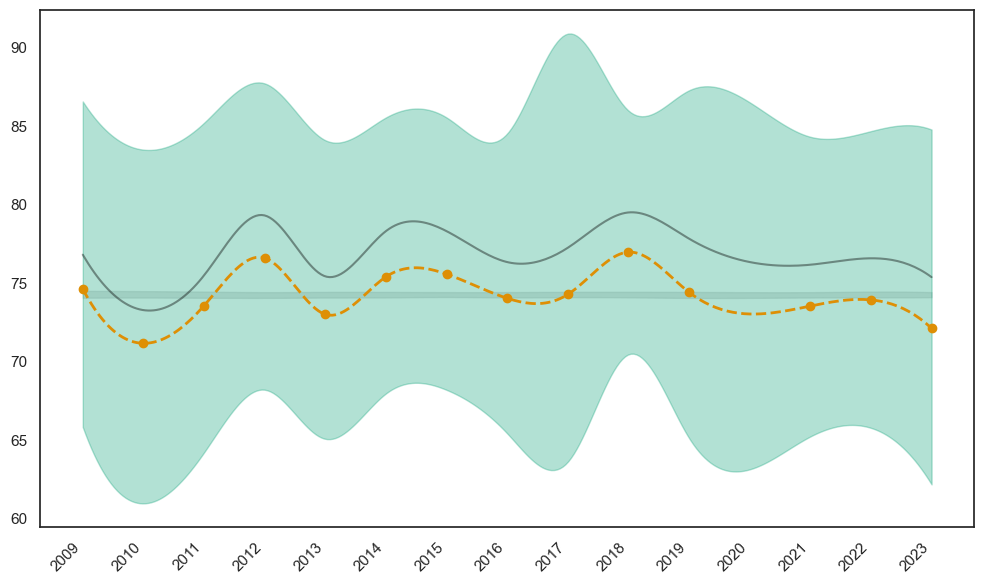

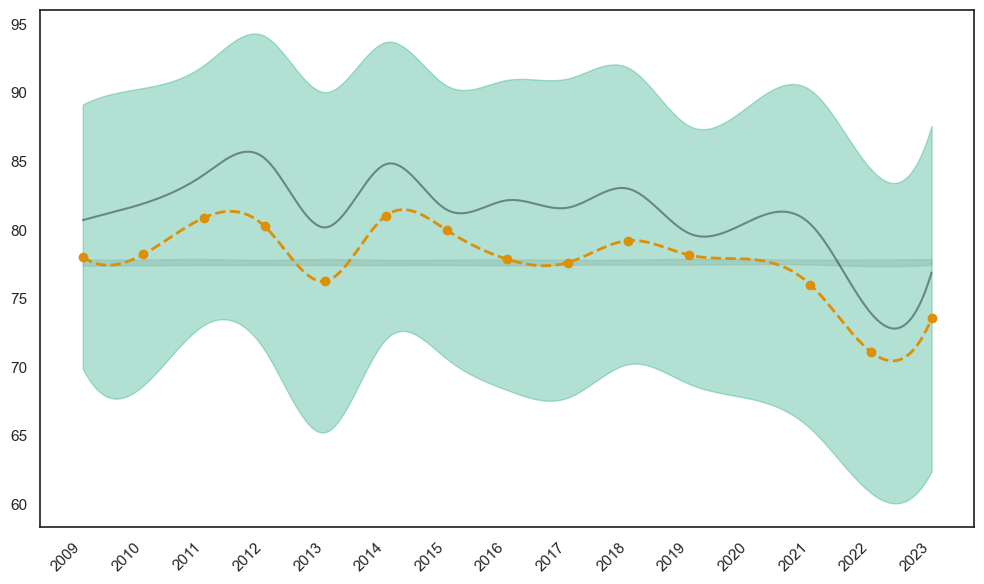

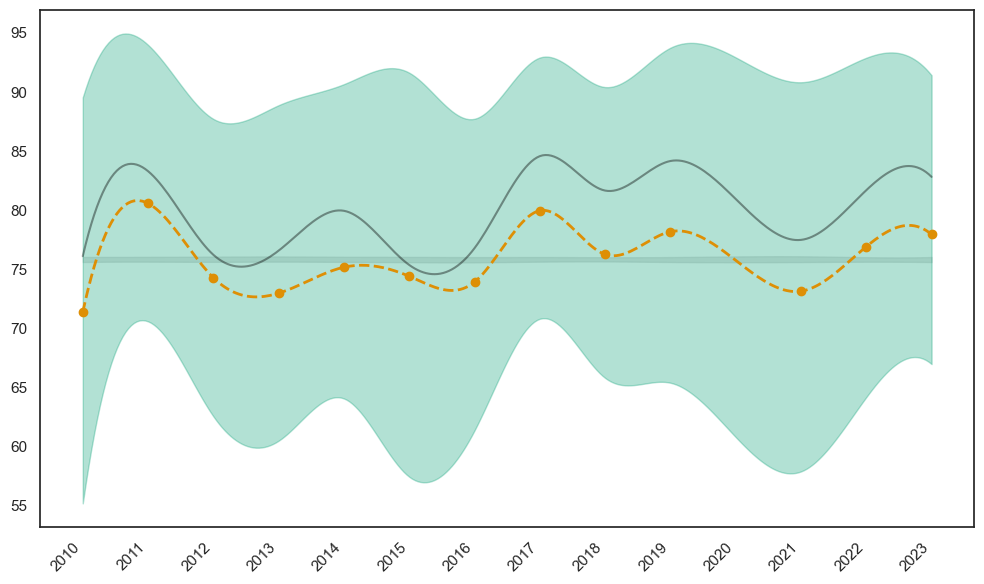

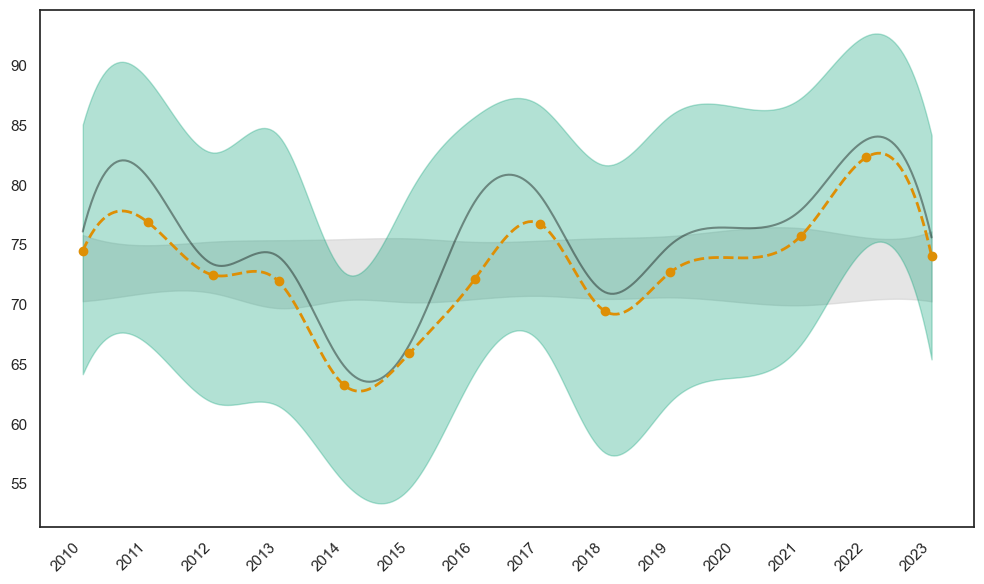

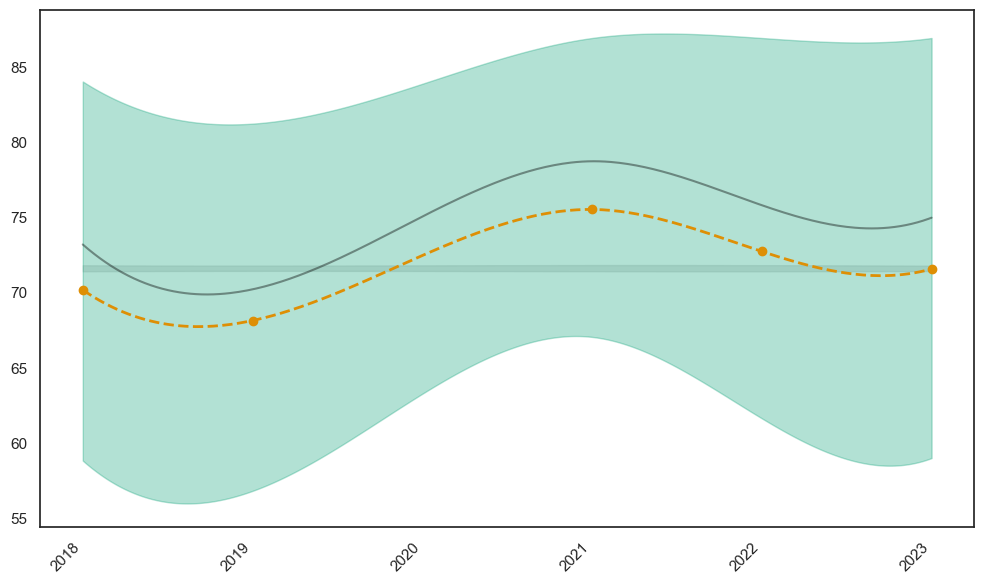

In [25]:
from scipy.interpolate import make_interp_spline

# Number of simulations (for the randomization)
N_sim = 1000  # It takes a while, but for robustness is necessary (it changes if one does 500 simulations for instance)

subjects = [col for col in df_prim.columns if col[0] == 'P' and '_' not in col]

for subject in subjects:

    df_subject = df_prim[['ANY', subject]].dropna().copy()
    df_subject['ANY'] = df_subject['ANY'].astype(int)

    years = sorted(df_subject['ANY'].unique())
    years_array = np.array(years)

    # --- computing observables ---
    mean = []
    median = []
    q1 = []
    q3 = []

    for yr in years:
        data = df_subject[df_subject['ANY'] == yr][subject]
        mean.append(np.mean(data))
        median.append(np.median(data))
        q1.append(np.percentile(data, 25))
        q3.append(np.percentile(data, 75))

    mean_array = np.array(mean)
    median_array = np.array(median)
    q1_array = np.array(q1)
    q3_array = np.array(q3)

    # --- Smoothing of the data (just for aesthetic reasons) ---
    years_smooth = np.linspace(years_array.min(), years_array.max(), 300)

    mean_smooth = make_interp_spline(years_array, mean_array)(years_smooth)
    median_smooth = make_interp_spline(years_array, median_array)(years_smooth)
    q1_smooth = make_interp_spline(years_array, q1_array)(years_smooth)
    q3_smooth = make_interp_spline(years_array, q3_array)(years_smooth)

    # =========================================================
    #                  ADD THE RANDOMIZATION SIMULATIONS
    # =========================================================

    sim_mean = np.zeros((N_sim, len(years)))
    sim_q1 = np.zeros((N_sim, len(years)))
    sim_q3 = np.zeros((N_sim, len(years)))

    grades = df_subject[subject].values  # vector de notas reales
    real_yrs = df_subject['ANY'].values

    for s in range(N_sim):
        # 1) randomize the years
        yrs_random = np.random.permutation(real_yrs)

        # 2) create simulated data frame
        df_sim = pd.DataFrame({
            'ANY': yrs_random,
            subject: grades
        })

        # 3) compute stats
        for i, yr in enumerate(years):
            data_s = df_sim[df_sim['ANY'] == yr][subject]

            if len(data_s) > 0:
                sim_mean[s, i] = data_s.mean()
                sim_q1[s, i] = np.percentile(data_s, 25)
                sim_q3[s, i] = np.percentile(data_s, 75)
            else:
                sim_mean[s, i] = np.nan
                sim_q1[s, i] = np.nan
                sim_q3[s, i] = np.nan

    # Min–max between simulations
    sim_mean_min = np.nanmin(sim_mean, axis=0)
    sim_mean_max = np.nanmax(sim_mean, axis=0)

    # smooth bands
    sim_mean_min_s = make_interp_spline(years_array, sim_mean_min)(years_smooth)
    sim_mean_max_s = make_interp_spline(years_array, sim_mean_max)(years_smooth)

    # =========================================================
    #                      FINAL PLOT
    # =========================================================

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.fill_between(
        years_smooth,
        sim_mean_min_s,
        sim_mean_max_s,
        color="#CCCCCC",
        alpha=0.5,
    )

    # --- Real median ---
    ax.plot(years_smooth, median_smooth, '-',
            color='black', linewidth=1.5, alpha=0.4, label='Median')

    # --- Real mean---
    ax.plot(years_smooth, mean_smooth, '--',
            color='#DE8F05', linewidth=2, label='Media')
    ax.plot(years_array, mean_array, 'o',
            markerfacecolor='#DE8F05', markeredgecolor='#DE8F05')

    # --- Real area Q1–Q3 ---
    ax.fill_between(years_smooth, q1_smooth, q3_smooth,
                    color='#029E73', alpha=0.3, label='IQR (Q1–Q3)')

    years_complete = np.arange(years_array.min(), years_array.max() + 1)
    plt.xticks(years_complete, rotation=45, ha='right')
    # plt.xticks(años_array, rotation=45, ha='right')

    # plt.legend()
    plt.tight_layout()
    filename = f'evol_{subject}_prim.pdf'
    plt.savefig(os.path.join(time_root, filename), bbox_inches="tight")
    plt.show()


### Secondary

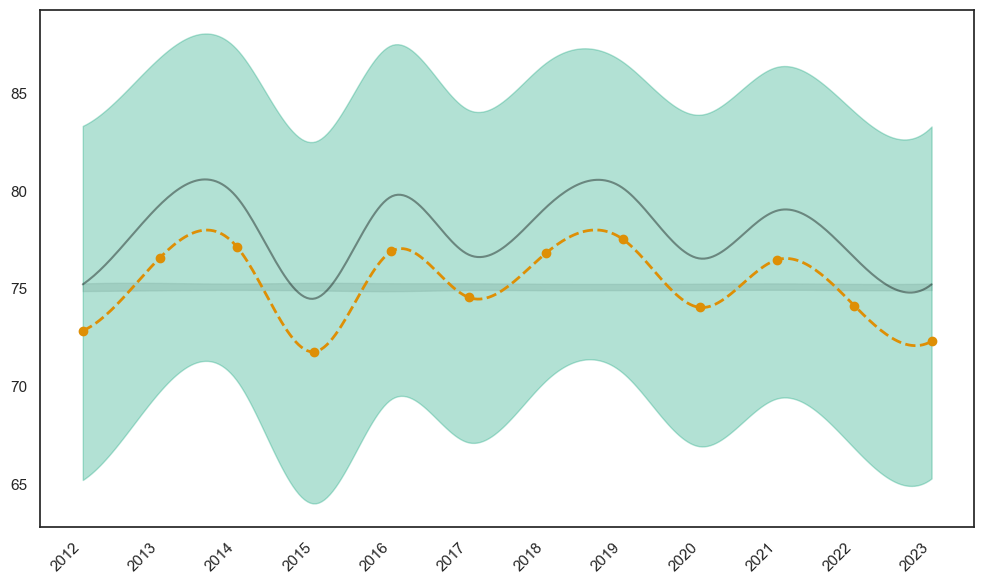

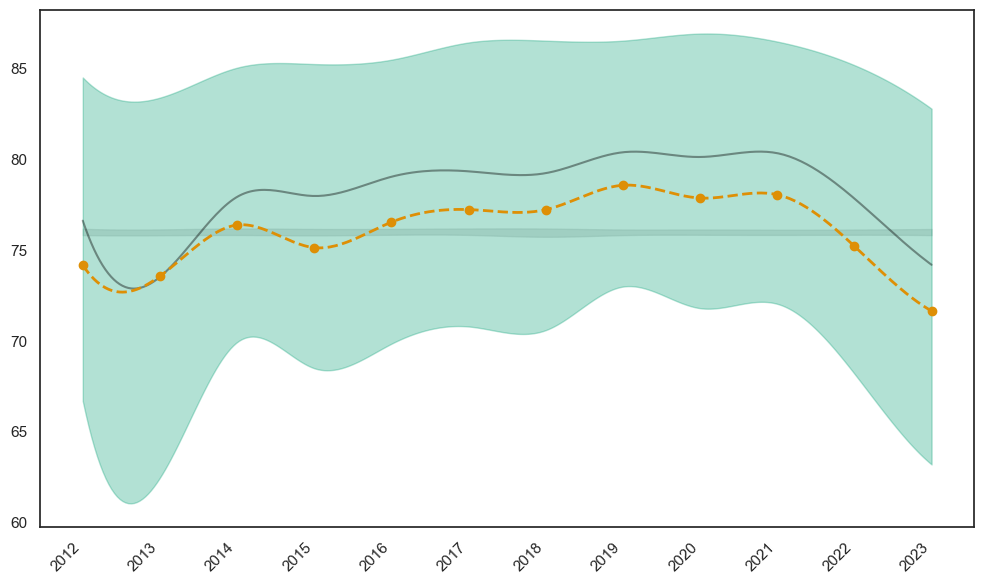

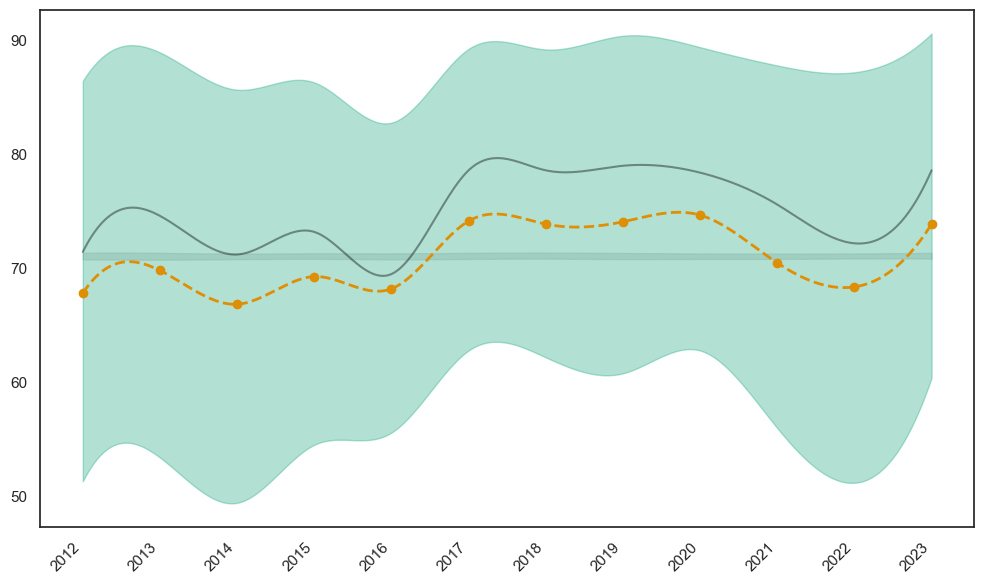

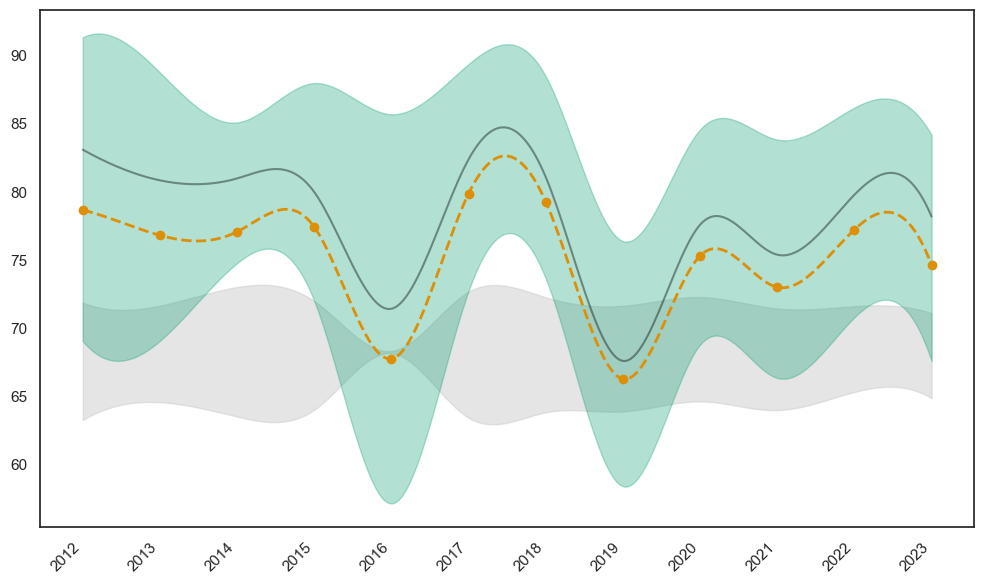

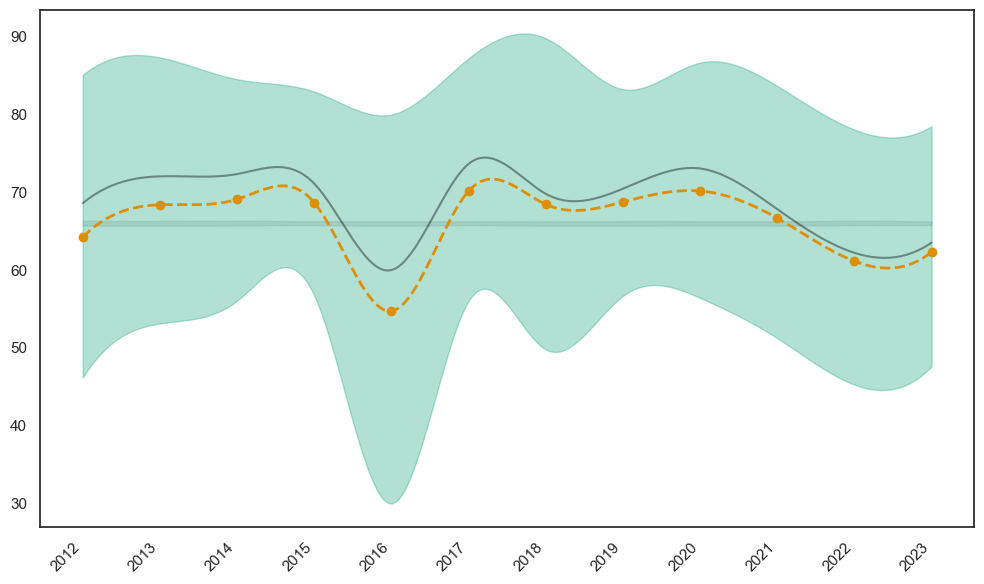

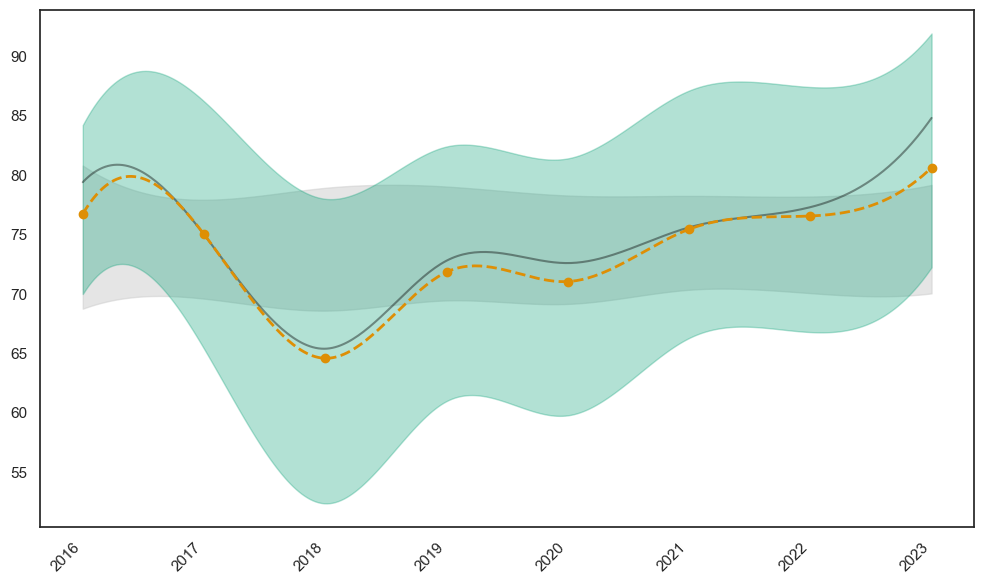

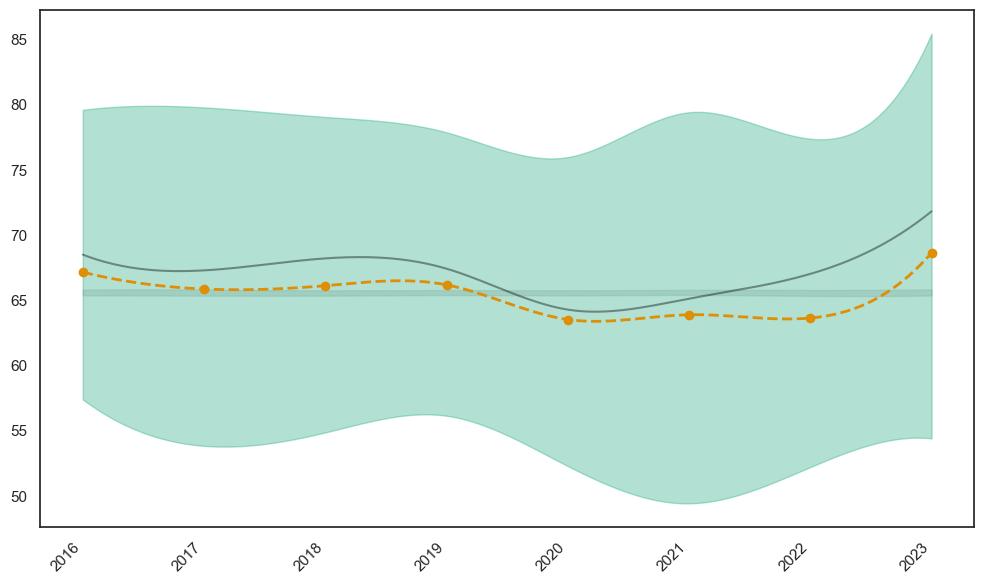

In [36]:
from scipy.interpolate import make_interp_spline

# Number of simulations (for the randomization)
N_sim = 1000  # It takes a while, but for robustness is necessary (it changes if one does 500 simulations for instance)

subjects = [col for col in df_sec.columns if col[0] == 'P' and '_' not in col]

for subject in subjects:

    df_subject = df_sec[['ANY', subject]].dropna().copy()
    df_subject['ANY'] = df_subject['ANY'].astype(int)

    years = sorted(df_subject['ANY'].unique())
    years_array = np.array(years)

    # --- computing observables ---
    mean = []
    median = []
    q1 = []
    q3 = []

    for yr in years:
        data = df_subject[df_subject['ANY'] == yr][subject]
        mean.append(np.mean(data))
        median.append(np.median(data))
        q1.append(np.percentile(data, 25))
        q3.append(np.percentile(data, 75))

    mean_array = np.array(mean)
    median_array = np.array(median)
    q1_array = np.array(q1)
    q3_array = np.array(q3)

    # --- Smoothing of the data (just for aesthetic reasons) ---
    years_smooth = np.linspace(years_array.min(), years_array.max(), 300)

    mean_smooth = make_interp_spline(years_array, mean_array)(years_smooth)
    median_smooth = make_interp_spline(years_array, median_array)(years_smooth)
    q1_smooth = make_interp_spline(years_array, q1_array)(years_smooth)
    q3_smooth = make_interp_spline(years_array, q3_array)(years_smooth)

    # =========================================================
    #                  ADD THE RANDOMIZATION SIMULATIONS
    # =========================================================

    sim_mean = np.zeros((N_sim, len(years)))
    sim_q1 = np.zeros((N_sim, len(years)))
    sim_q3 = np.zeros((N_sim, len(years)))

    grades = df_subject[subject].values  # vector de notas reales
    real_yrs = df_subject['ANY'].values

    for s in range(N_sim):
        # 1) randomize the years
        yrs_random = np.random.permutation(real_yrs)

        # 2) create simulated data frame
        df_sim = pd.DataFrame({
            'ANY': yrs_random,
            subject: grades
        })

        # 3) compute stats
        for i, yr in enumerate(years):
            data_s = df_sim[df_sim['ANY'] == yr][subject]

            if len(data_s) > 0:
                sim_mean[s, i] = data_s.mean()
                sim_q1[s, i] = np.percentile(data_s, 25)
                sim_q3[s, i] = np.percentile(data_s, 75)
            else:
                sim_mean[s, i] = np.nan
                sim_q1[s, i] = np.nan
                sim_q3[s, i] = np.nan

    # Min–max between simulations
    sim_mean_min = np.nanmin(sim_mean, axis=0)
    sim_mean_max = np.nanmax(sim_mean, axis=0)

    # smooth bands
    sim_mean_min_s = make_interp_spline(years_array, sim_mean_min)(years_smooth)
    sim_mean_max_s = make_interp_spline(years_array, sim_mean_max)(years_smooth)

    # =========================================================
    #                      FINAL PLOT
    # =========================================================

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.fill_between(
        years_smooth,
        sim_mean_min_s,
        sim_mean_max_s,
        color="#CCCCCC",
        alpha=0.5,
    )

    # --- Real median ---
    ax.plot(years_smooth, median_smooth, '-',
            color='black', linewidth=1.5, alpha=0.4, label='Median')

    # --- Real mean---
    ax.plot(years_smooth, mean_smooth, '--',
            color='#DE8F05', linewidth=2, label='Media')
    ax.plot(years_array, mean_array, 'o',
            markerfacecolor='#DE8F05', markeredgecolor='#DE8F05')

    # --- Real area Q1–Q3 ---
    ax.fill_between(years_smooth, q1_smooth, q3_smooth,
                    color='#029E73', alpha=0.3, label='IQR (Q1–Q3)')

    years_complete = np.arange(years_array.min(), years_array.max() + 1)
    plt.xticks(years_complete, rotation=45, ha='right')
    # plt.xticks(años_array, rotation=45, ha='right')

    # plt.legend()
    plt.tight_layout()
    filename = f'evol_{subject}_sec.pdf'
    plt.savefig(os.path.join(time_root, filename), bbox_inches="tight")
    plt.show()


# Heatmaps
Finally a more numerical oriented, compact representation of some 'key' features of the distribution (asymmetry and variability) are computed and represented in heatmaps.

## Asymmetry: Heatmap (mean-median)

### Primary

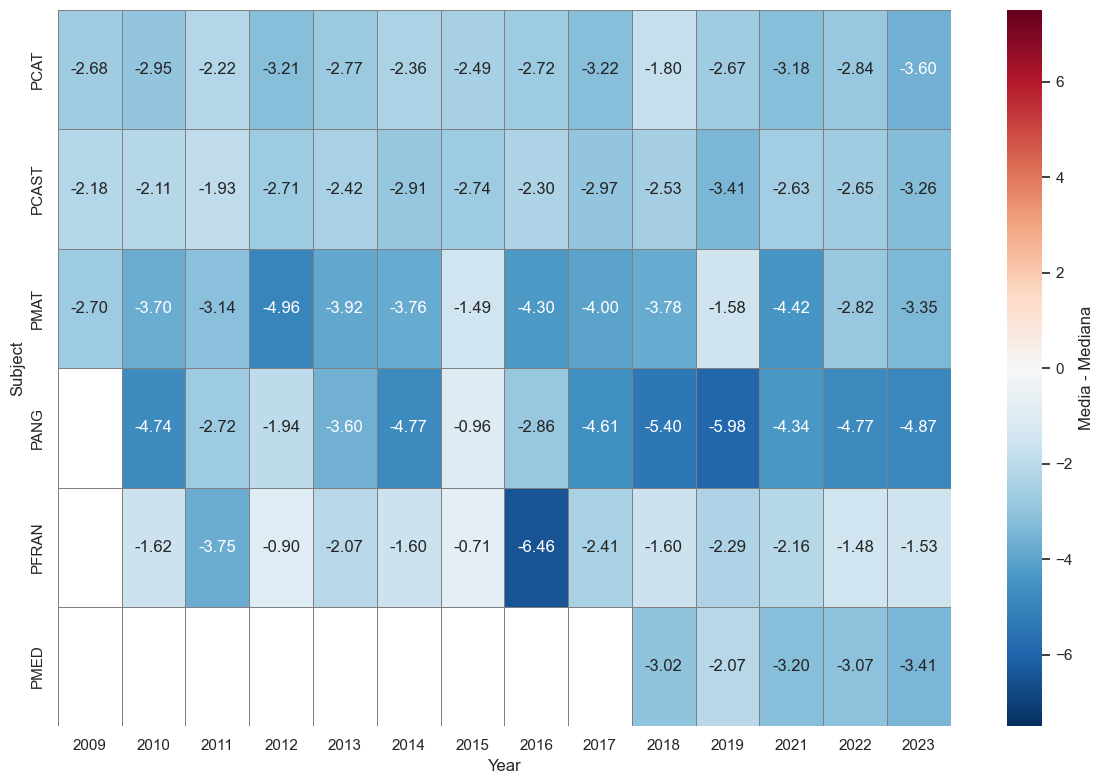

In [30]:
from matplotlib.colors import TwoSlopeNorm

subjects = [col for col in df_prim.columns if col[0] == 'P' and '_' not in col]

# Create dictionaries to store mean grades and median per year and subject
grades_mean = {}
grades_median = {}

for subject in subjects:
    # Prepare data in long format 
    df_subject = df_prim[['ANY', subject]].copy()
    df_subject = df_subject.dropna() 
    df_subject['ANY'] = df_subject['ANY'].astype(int) 
    
    # Compute mean and median per year
    means_by_year = df_subject.groupby('ANY')[subject].mean()
    median_by_year = df_subject.groupby('ANY')[subject].median()

    grades_mean[subject] = means_by_year
    grades_median[subject] = median_by_year

# convert dictionaries to dataFrames
df_grades_mean = pd.DataFrame(grades_mean)
df_grades_median = pd.DataFrame(grades_median)

df_grades_mean = df_grades_mean.transpose()
df_grades_median = df_grades_median.transpose()

# Compute difference: mean-median
df_dif = df_grades_mean - df_grades_median

vmin = df_dif.min().min()
vmax = df_dif.max().max()

# Make sure that the scale includes positive values
vmax = max(vmax, 0.5)

# Normalization with 0 at the center
norm = TwoSlopeNorm(vcenter=0, vmin=-15*abs(vmax), vmax=15*abs(vmax))

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 8))  
sns.heatmap(df_dif, cmap="RdBu_r", annot=True, fmt=".2f", 
            norm=norm, cbar_kws={'label': 'Media - Mediana'}, 
            linewidths=0.5, linecolor='gray', ax=ax)

for line in ax.get_lines():
    line.set_visible(False)

for i in range(len(df_dif.columns) + 1):
    ax.axvline(i, color='gray', linewidth=0.5)

# show years in the x axis
ax.set_xticks(np.arange(len(df_dif.columns)) + 0.5)
ax.set_xticklabels(df_dif.columns, rotation=0)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Subject', fontsize=12)
plt.tight_layout()
filename = f'heat_mean-median_{subject}_prim.pdf'
plt.savefig(os.path.join(time_root, filename), bbox_inches="tight")
plt.show()

### Secondary

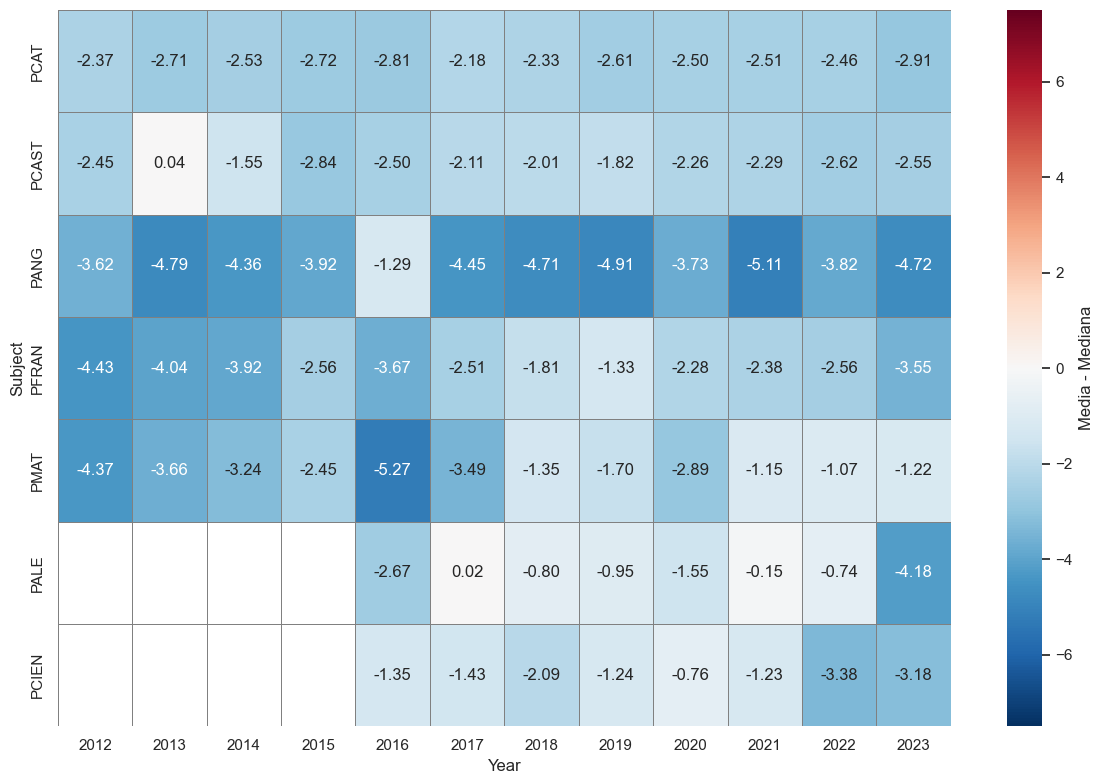

In [29]:
from matplotlib.colors import TwoSlopeNorm

subjects = [col for col in df_sec.columns if col[0] == 'P' and '_' not in col]

# Create dictionaries to store mean grades and median per year and subject
grades_mean = {}
grades_median = {}

for subject in subjects:
    # Prepare data in long format 
    df_subject = df_sec[['ANY', subject]].copy()
    df_subject = df_subject.dropna() 
    df_subject['ANY'] = df_subject['ANY'].astype(int) 
    
    # Compute mean and median per year
    means_by_year = df_subject.groupby('ANY')[subject].mean()
    median_by_year = df_subject.groupby('ANY')[subject].median()

    grades_mean[subject] = means_by_year
    grades_median[subject] = median_by_year

# convert dictionaries to dataFrames
df_grades_mean = pd.DataFrame(grades_mean)
df_grades_median = pd.DataFrame(grades_median)

df_grades_mean = df_grades_mean.transpose()
df_grades_median = df_grades_median.transpose()

# Compute difference: mean-median
df_dif = df_grades_mean - df_grades_median

vmin = df_dif.min().min()
vmax = df_dif.max().max()

# Make sure that the scale includes positive values
vmax = max(vmax, 0.5)

# Normalization with 0 at the center
norm = TwoSlopeNorm(vcenter=0, vmin=-15*abs(vmax), vmax=15*abs(vmax))

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 8))  
sns.heatmap(df_dif, cmap="RdBu_r", annot=True, fmt=".2f", 
            norm=norm, cbar_kws={'label': 'Media - Mediana'}, 
            linewidths=0.5, linecolor='gray', ax=ax)

for line in ax.get_lines():
    line.set_visible(False)

for i in range(len(df_dif.columns) + 1):
    ax.axvline(i, color='gray', linewidth=0.5)

# show years in the x axis
ax.set_xticks(np.arange(len(df_dif.columns)) + 0.5)
ax.set_xticklabels(df_dif.columns, rotation=0)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Subject', fontsize=12)
plt.tight_layout()
filename = f'heat_mean-median_{subject}_sec.pdf'
plt.savefig(os.path.join(time_root, filename), bbox_inches="tight")
plt.show()

## Variability: Heatmap(IQR/Q1)
A 'healthy' distribution has IQR/Q1 between 0.5 and 1.5; the ideal is to compare with a gaussian: IQR/Q1=1. Therefore the color scale uses [0,1] to show how close to 1 it is (some values are above but it looks as intended).

### Primary

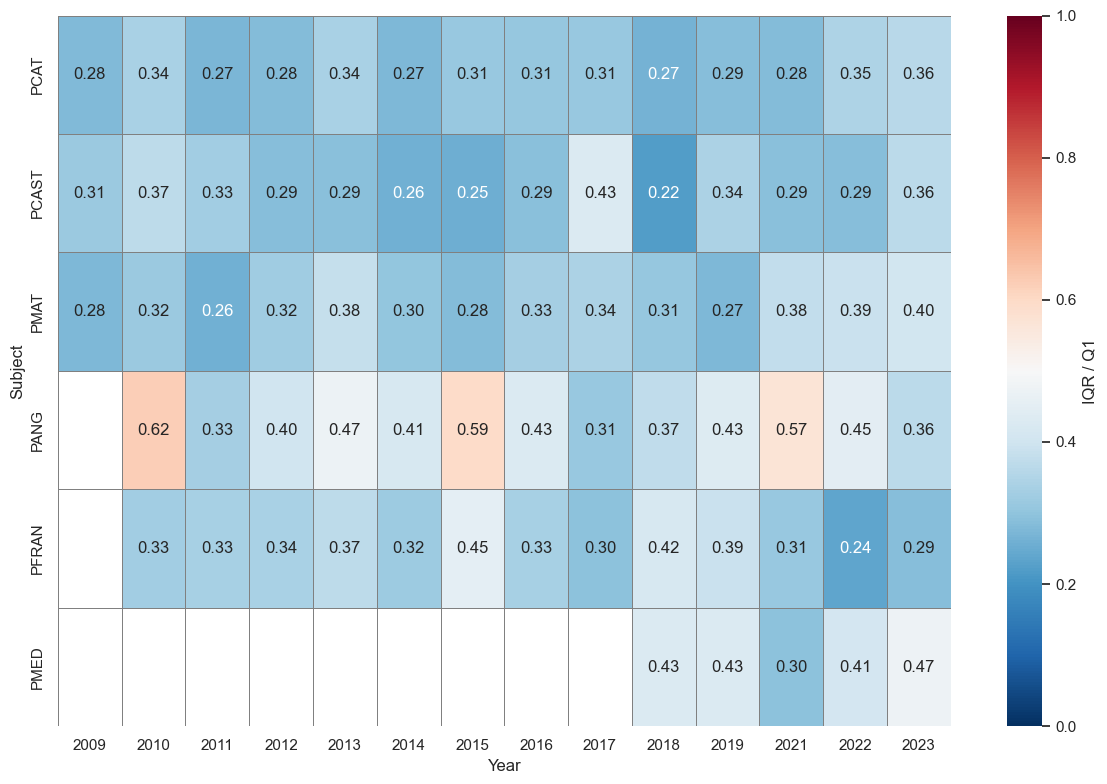

In [32]:
from matplotlib.colors import Normalize

subjects = [col for col in df_prim.columns if col[0] == 'P' and '_' not in col]

# Create dictionary to store IQR/Q1 per year and subject
iqr_q1 = {}

for subject in subjects:
    df_subject = df_prim[['ANY', subject]].copy()
    df_subject = df_subject.dropna()
    df_subject['ANY'] = df_subject['ANY'].astype(int)

    # Calcular Q1 and Q3 by year
    q1 = df_subject.groupby('ANY')[subject].quantile(0.25)
    q3 = df_subject.groupby('ANY')[subject].quantile(0.75)

    # Compute IQR
    iqr = q3 - q1

    # Comput IQR/Q1
    ratio = iqr / q1.replace(0, np.nan)

    iqr_q1[subject] = ratio

df_iqr_q1 = pd.DataFrame(iqr_q1).transpose()

vmin = 0
vmax = 1
norm = Normalize(vmin=vmin, vmax=vmax)

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_iqr_q1, cmap="RdBu_r", annot=True, fmt=".2f",
            norm=norm, cbar_kws={'label': 'IQR / Q1'},
            linewidths=0.5, linecolor='gray', ax=ax)

for line in ax.get_lines():
    line.set_visible(False)

for i in range(len(df_iqr_q1.columns) + 1):
    ax.axvline(i, color='gray', linewidth=0.5)

ax.set_xticks(np.arange(len(df_iqr_q1.columns)) + 0.5)
ax.set_xticklabels(df_iqr_q1.columns, rotation=0)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Subject', fontsize=12)
plt.tight_layout()
filename=f'heat_IRQdivQ1_{subject}_prim.pdf'
plt.savefig(os.path.join(time_root, filename), bbox_inches="tight")
plt.show()


### Secondary

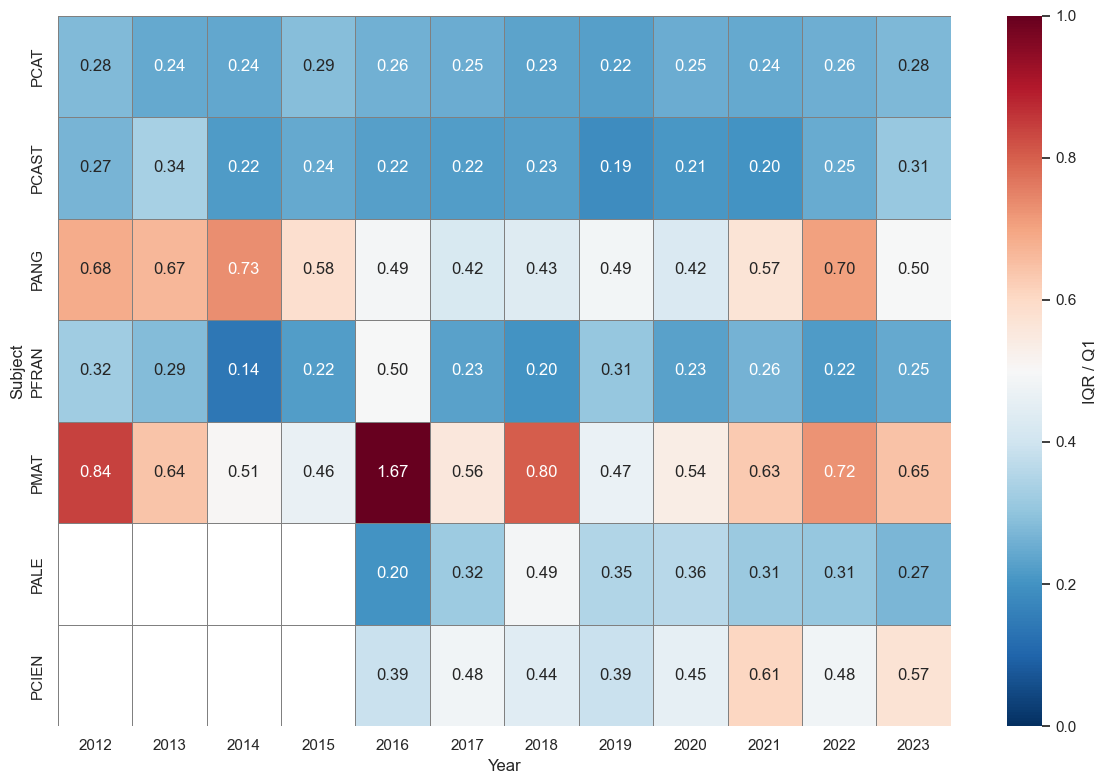

In [35]:
from matplotlib.colors import Normalize

subjects = [col for col in df_sec.columns if col[0] == 'P' and '_' not in col]

# Create dictionary to store IQR/Q1 per year and subject
iqr_q1 = {}

for subject in subjects:
    df_subject = df_sec[['ANY', subject]].copy()
    df_subject = df_subject.dropna()
    df_subject['ANY'] = df_subject['ANY'].astype(int)

    # Calcular Q1 and Q3 by year
    q1 = df_subject.groupby('ANY')[subject].quantile(0.25)
    q3 = df_subject.groupby('ANY')[subject].quantile(0.75)

    # Compute IQR
    iqr = q3 - q1

    # Comput IQR/Q1
    ratio = iqr / q1.replace(0, np.nan)

    iqr_q1[subject] = ratio

df_iqr_q1 = pd.DataFrame(iqr_q1).transpose()

vmin = 0
vmax = 1
norm = Normalize(vmin=vmin, vmax=vmax)

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_iqr_q1, cmap="RdBu_r", annot=True, fmt=".2f",
            norm=norm, cbar_kws={'label': 'IQR / Q1'},
            linewidths=0.5, linecolor='gray', ax=ax)

for line in ax.get_lines():
    line.set_visible(False)

for i in range(len(df_iqr_q1.columns) + 1):
    ax.axvline(i, color='gray', linewidth=0.5)

ax.set_xticks(np.arange(len(df_iqr_q1.columns)) + 0.5)
ax.set_xticklabels(df_iqr_q1.columns, rotation=0)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Subject', fontsize=12)
plt.tight_layout()
filename=f'heat_IRQdivQ1_{subject}_sec.pdf'
plt.savefig(os.path.join(time_root, filename), bbox_inches="tight")
plt.show()
